In [15]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# importando dados
dados = pd.read_csv('winequality-red.csv', sep = ';')
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1) No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

R: (1599,12)

2. Quantos tipos diferentes de dados existem no dataset do desafio?

R: 2

In [17]:
# verificando
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


3. Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açúcar)?

R: 0%

In [18]:
dados.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

4. Qual é o desvio padrão para a variável "fixed acidity"?

R: 1.7

In [19]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


5. Qual é a mediana para a variável "residual sugar"?

R: 2.2

In [20]:
dados.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

6. Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH", é CORRETO afirmar:

R: Existe uma correlação positiva. Quanto maior o "fixed acidity, menor é o "pH".

7. Sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol", mesmo sendo reduzido, é CORRETO dizer:

R: Quanto maior o teor alcoólico (alcohol), maior é a qualidade do vinho (quality).

<Axes: >

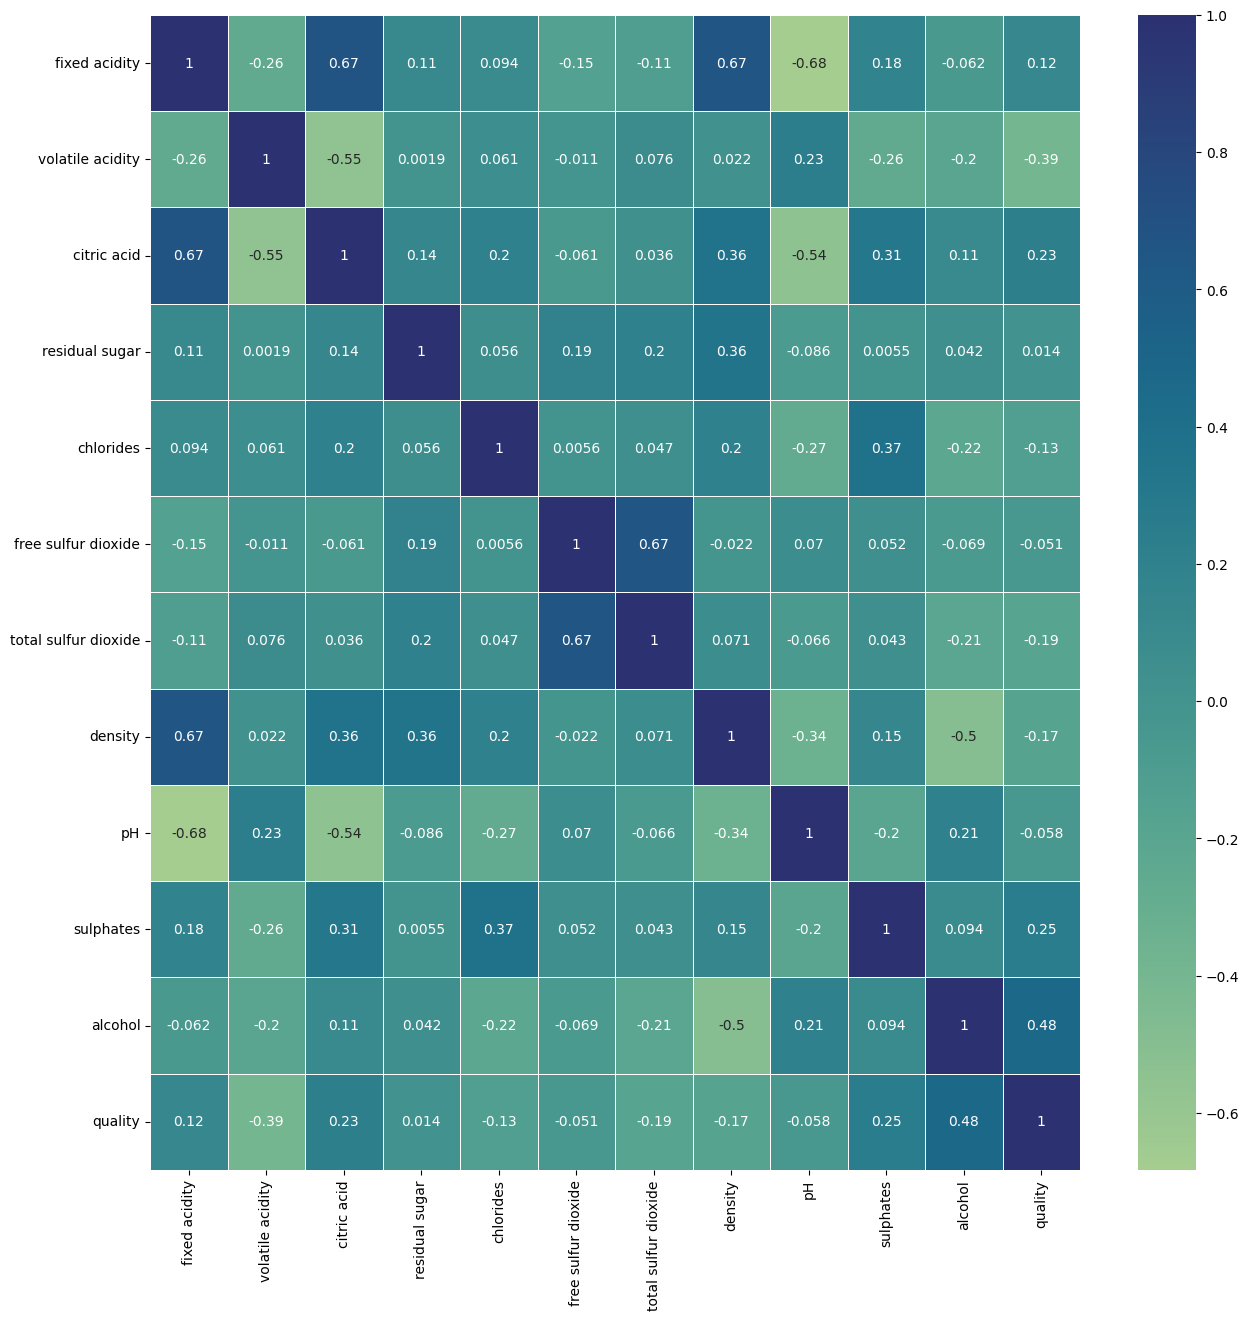

In [21]:
fig, ax = plt.subplots(figsize= (15, 15))
sns.heatmap(dados.corr(),
            annot= True,
            linewidths= 0.5,
            cmap = 'crest',
            )

8. Quantas instâncias existem para a qualidade do vinho igual a 5?

R: 681

In [22]:
len(dados[dados.quality == 5])

681

9. Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?

R: 0

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dados_e = scaler.fit_transform(dados)
dados_e = pd.DataFrame(dados_e, columns = dados.columns)

dados_e.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,0.329171,0.154079,0.0,0.221239,0.292035,0.407080,1.0
volatile acidity,1599.0,0.279329,0.122644,0.0,0.184932,0.273973,0.356164,1.0
citric acid,1599.0,0.270976,0.194801,0.0,0.090000,0.260000,0.420000,1.0
residual sugar,1599.0,0.112247,0.096570,0.0,0.068493,0.089041,0.116438,1.0
chlorides,1599.0,0.125988,0.078573,0.0,0.096828,0.111853,0.130217,1.0
free sulfur dioxide,1599.0,0.209506,0.147326,0.0,0.084507,0.183099,0.281690,1.0
total sulfur dioxide,1599.0,0.142996,0.116238,0.0,0.056537,0.113074,0.197880,1.0
density,1599.0,0.490211,0.138571,0.0,0.406021,0.490455,0.570117,1.0
pH,1599.0,0.449695,0.121564,0.0,0.370079,0.448819,0.519685,1.0
sulphates,1599.0,0.196496,0.101501,0.0,0.131737,0.173653,0.239521,1.0


RESSALVA: Originalmente o guia da atividade orienta a realização do scaler ANTES do treino/teste, realizando dessa forma é equivocado pois nos leva a data leakege.
Para a realização foi elaborado um pipeline afim de deixar o processo mais organizado

In [24]:
# Separando o dataset
X = dados.drop(columns = ['quality'])
y = dados['quality']

# Realizando o slit de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [25]:
# importando os modelos a serem testados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# importando o pipeline
from sklearn.pipeline import Pipeline

In [26]:
# organizando os pipelines
pipe_KNN = Pipeline([('scaler', MinMaxScaler()),
                    ('knn',  KNeighborsClassifier(n_neighbors=5))])

pipe_DTC = Pipeline([('scaler', MinMaxScaler()),
                    ('tree',  DecisionTreeClassifier())])

pipe_RFC = Pipeline([('scaler', MinMaxScaler()),
                    ('Forest',   RandomForestClassifier(max_depth=10, random_state=1))])

pipe_SVC = Pipeline([('scaler', MinMaxScaler()),
                    ('svc',  SVC(gamma='auto',kernel='rbf'))])

pipe_MPL = Pipeline([('scaler', MinMaxScaler()),
                    ('mlp',  MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1))])

   

10. Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurácia para o KNN?

R: 0.56

11. Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste, como mostrado anteriormente, qual é o valor da acurácia?

R: ~0.60

12. Aplicando o algoritmo de floresta randômica com os mesmos parâmetros apresentados no enunciado e mesmos valores para o treinamento e teste, qual é o valor mais próximo para a acurácia?

R: ~0.68

13. Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor mais próximo para a acurácia obtido?

R: ~0.58

14. Aplicando a rede MLP, como mostrado no enunciado, e com os mesmos dados de treinamento e teste utilizados, qual é o valor mais próximo para a acurácia do modelo?

R: ~0.60

In [27]:
#Treinando todos os modelos de uma vez
modelos = [pipe_KNN, pipe_DTC, pipe_RFC, pipe_SVC, pipe_MPL]
for pipe in modelos:
    pipe.fit(X_train,y_train)


# rodando as avaliações
modelos_dic = {0: 'KNeighbors Classificador', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'SVC', 
             4: 'MLP'}
for i, model in enumerate(modelos):
    print('{} Acurácia do teste: {}'.format(modelos_dic[i], model.score(X_test,y_test)))
    

KNeighbors Classificador Acurácia do teste: 0.5583333333333333
Decision Trees Acurácia do teste: 0.5791666666666667
Random Forest Acurácia do teste: 0.6770833333333334
SVC Acurácia do teste: 0.5833333333333334
MLP Acurácia do teste: 0.5979166666666667


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


15. Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual é o valor mais próximo da acurácia do modelo para esse novo dataset?

R: ~0.80

In [28]:
# Realizando a substituição solicitada
y = y.replace({ 3 : 0,
                4 : 0,
                5 : 0,
                6 : 1,
                7 : 1,
                8 : 1

 })

# Novo split de separação:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# realizando o fit
for pipe in modelos:
    pipe.fit(X_train,y_train)


# rodando as avaliações
modelos_dic = {0: 'KNeighbors Classificador', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'SVC', 
             4: 'MLP'}
for i, model in enumerate(modelos):
    print('{} Acurácia do teste: {}'.format(modelos_dic[i], model.score(X_test,y_test)))
    

KNeighbors Classificador Acurácia do teste: 0.69375
Decision Trees Acurácia do teste: 0.7729166666666667
Random Forest Acurácia do teste: 0.8041666666666667
SVC Acurácia do teste: 0.7416666666666667
MLP Acurácia do teste: 0.7416666666666667


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Esse código foi originário como resposta ao "Desafio Prático - Módulo 1: Fundamentos de Aprendizado de Máquina" do Bootcamp: Engenheiro de Machine Learning da XP Educação.
